<a href="https://colab.research.google.com/github/groneperrosato/academic/blob/main/ANN_clasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will be using Deep Learning and Artificial Neural Networks (ANN) to develop a regression model. Regression analysis is a statistical method used to establish relationships between dependent and independent variables. The goal of this notebook is to build a model that can predict a dependent variable based on a set of independent variables.

Deep learning is a type of machine learning that uses neural networks with multiple hidden layers to learn from large amounts of data. ANN is a type of deep learning that is modeled after the structure of the human brain. It is particularly useful for modeling complex non-linear relationships between variables.

Our objective is to create an accurate and robust regression model that can be used for predicting continuous variables. We will use various techniques such as: 

- Preprocessing the data
- Build the network
- Configure the training
- Train the model
- Evaluate the model

In this notebook, we will be working with a specific problem of classification. We will use the power of deep learning and ANN to create a model that can accurately classify the photos based on their content.

# Get the Data

To access the [MNIST](https://www.tensorflow.org/datasets/catalog/mnist?hl=es-419) dataset, we will use the TensorFlow Keras API. The API provides a convenient way to download and load the dataset into our notebook. Once we have loaded the dataset, we can begin exploring its contents.

In [1]:
# import the libraries

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

In [2]:
# get the data

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Descriptive Analysis

We will perform a short descriptive analysis to understand the structure and properties of our dataset. 

Overall, performing a descriptive analysis is an important step in the machine learning process as it helps us understand the data and make informed decisions about how to proceed with model development.

In [3]:
print("Our datasets have the following observations:")

for i in ["x_train", "y_train", "x_test", "y_test"]:
  print("\n", i, ": ", eval(i).shape[0])

Our datasets have the following observations:

 x_train :  60000

 y_train :  60000

 x_test :  10000

 y_test :  10000


In [4]:
# create a function to visualize the images

def show_images(images, gray = True):
  
  fig = plt.figure(figsize = (8,8))
  index = np.random.randint(len(images), size = 100)

  for i in range (len(index)):
    fig.add_subplot(10, 10, i+1)
    plt.axis("off")
    if gray:
      color: "gray"
    else:
      color: None
    plt.imshow(images[index[i]].reshape([28,28]), cmap = "gray")
    
  plt.show()

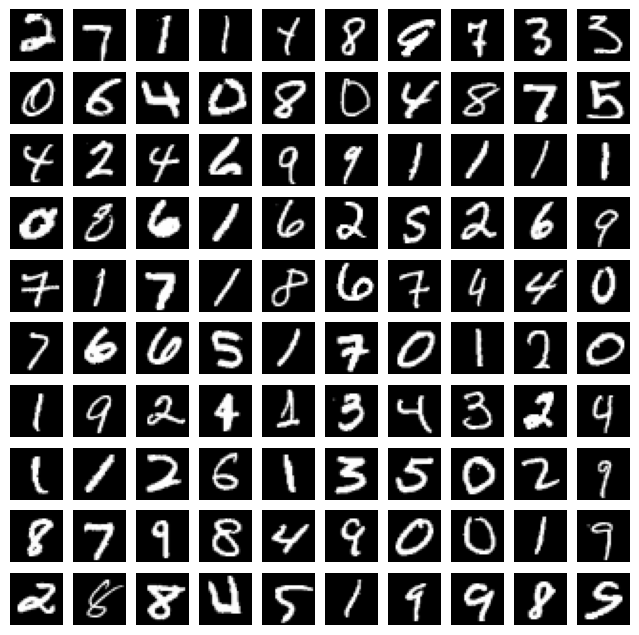

In [5]:
# visualize a sample of 100 observations of the train data

show_images(x_train)

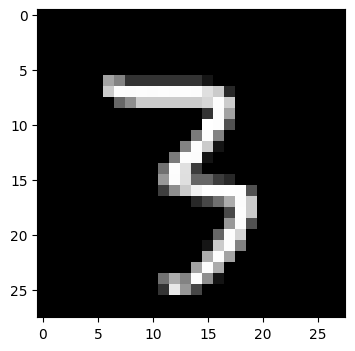

In [6]:
# visualize a single observation

plt.figure(figsize = (4,4))
plt.imshow(x_train[44], cmap = "gray")
plt.show()

In [7]:
# normalize the data to be more efficient

x_train = x_train / 255
x_test = x_test / 255

# Building the network

To build the neural network, we will use the TensorFlow.

The architecture of our neural network will include multiple layers of neurons, each with their own activation function. We will also include dropout layers to prevent overfitting and improve generalization performance.

After defining the network architecture, we will configure the training process. This involves selecting the appropriate loss function, optimizer, and metrics for evaluating the model's performance.

The loss function measures the difference between the predicted class labels and the actual class labels. The optimizer adjusts the weights and biases in the network to minimize the loss function. The metrics provide a measure of the model's performance during training.

Once the network architecture and training process have been defined, we will train the model using the preprocessed data. The training process involves iterating through the dataset multiple times and updating the weights and biases in the network.

The goal of the training process is to minimize the loss function and optimize the network's performance. It is important to monitor the training process and adjust the hyperparameters as necessary to achieve the best possible results.

In [8]:
# build the network

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

In [9]:
# see a resume of our network

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 128)               1

In [10]:
# configurate the model

opt = tf.keras.optimizers.Adam(
    learning_rate = 0.001
)

model.compile(
    optimizer = opt,
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [11]:
# train the model

hist = model.fit(
    x = x_train, y = y_train, validation_data = (x_test, y_test), epochs = 15
)

Epoch 1/15
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2764 - accuracy: 0.9165 - val_loss: 0.1487 - val_accuracy: 0.9552
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1296 - accuracy: 0.9637 - val_loss: 0.1192 - val_accuracy: 0.9680
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1006 - accuracy: 0.9715 - val_loss: 0.1150 - val_accuracy: 0.9696
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0817 - accuracy: 0.9767 - val_loss: 0.1146 - val_accuracy: 0.9683
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0670 - accuracy: 0.9809 - val_loss: 0.0930 - val_accuracy: 0.9771
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0586 - accuracy: 0.9835 - val_loss: 0.0947 - val_accuracy: 0.9760
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0508 - accuracy: 0.9858 - val_loss: 0.0916 - val_accura

# Evaluate the model

To evaluate the model, we will use the test data that we set aside earlier. We will pass the test data through the trained model and compare the predicted labels to the actual labels. We will calculate various metrics to understand the model's performance.

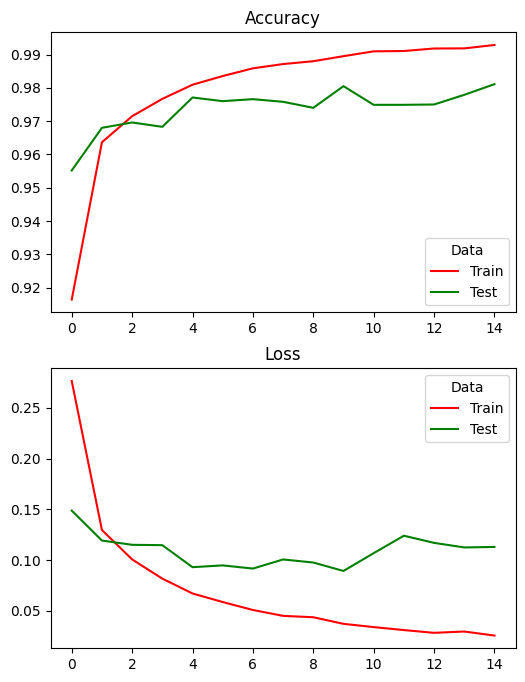

In [12]:
# visualize the accuracy and the loss of our model

fig, ax = plt.subplots(2, figsize = (6,8))

ax[0].plot(hist.history["accuracy"], color = "red", label = "Train")
ax[0].plot(hist.history["val_accuracy"], color = "green", label = "Test")
ax[0].legend(loc = "lower right", title = "Data")
ax[0].set_title("Accuracy")

ax[1].plot(hist.history["loss"], color = "red", label = "Train")
ax[1].plot(hist.history["val_loss"], color = "green", label = "Test")
ax[1].legend(loc = "upper right", title = "Data")
ax[1].set_title("Loss")

plt.show()

313/313 [==============================] - 1s 2ms/step


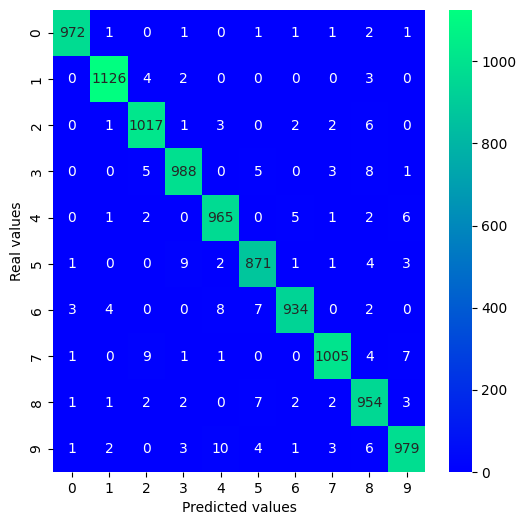

In [13]:
# get the matrix

from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(x_test)
number_predict = predictions.argmax(axis = 1)

cf = confusion_matrix(y_true = y_test, y_pred = number_predict)

plt.figure(figsize = (6,6))
sns.heatmap(data = cf,
            cmap = "winter",
            annot = True,
            fmt = "d"
            )
plt.xlabel("Predicted values")
plt.ylabel("Real values")

plt.show()

In [14]:
incorrect_class = np.where(y_test != number_predict)
correct_class = np.where(y_test == number_predict)

print("The model has predict", correct_class[0].size, "observations correctly and", incorrect_class[0].size, "incorrectly.")

The model has predict 9811 observations correctly and 189 incorrectly.


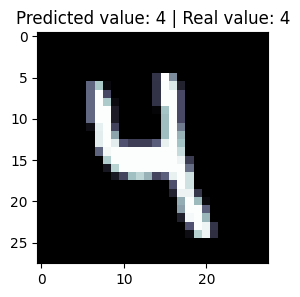

In [15]:
# visualize a sample of a good classification

index = np.random.choice(correct_class[0])

plt.figure(figsize = (3,3))
plt.imshow(X = x_test[index],
           cmap = "bone"
)
plt.title(f"Predicted value: {number_predict[index]} | Real value: {y_test[index]}")

plt.show()

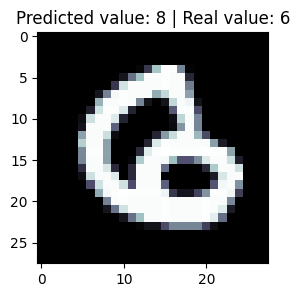

In [16]:
# visualize a sample of a wrong classification

index = np.random.choice(incorrect_class[0])

plt.figure(figsize = (3,3))
plt.imshow(X = x_test[index],
           cmap = "bone"
)
plt.title(f"Predicted value: {number_predict[index]} | Real value: {y_test[index]}")

plt.show()

In [17]:
# list of how many times each digit was wrong classified

zeros = y_test[incorrect_class].size - np.count_nonzero(y_test[incorrect_class])

print("Each digit have the following wrong classifications:\n")
print(f"0-> {zeros}")

unique = np.unique(y_test[incorrect_class])
sum = 0

for i in unique[1:]:
  count = np.count_nonzero(y_test[incorrect_class] == i)
  sum = sum + count
  print(f"{i}-> {count}")

sum = sum + zeros

print(f"\nThe total of wrong observations were: {sum}.")

Each digit have the following wrong classifications:

0-> 8
1-> 9
2-> 15
3-> 22
4-> 17
5-> 21
6-> 24
7-> 23
8-> 20
9-> 30

The total of wrong observations were: 189.


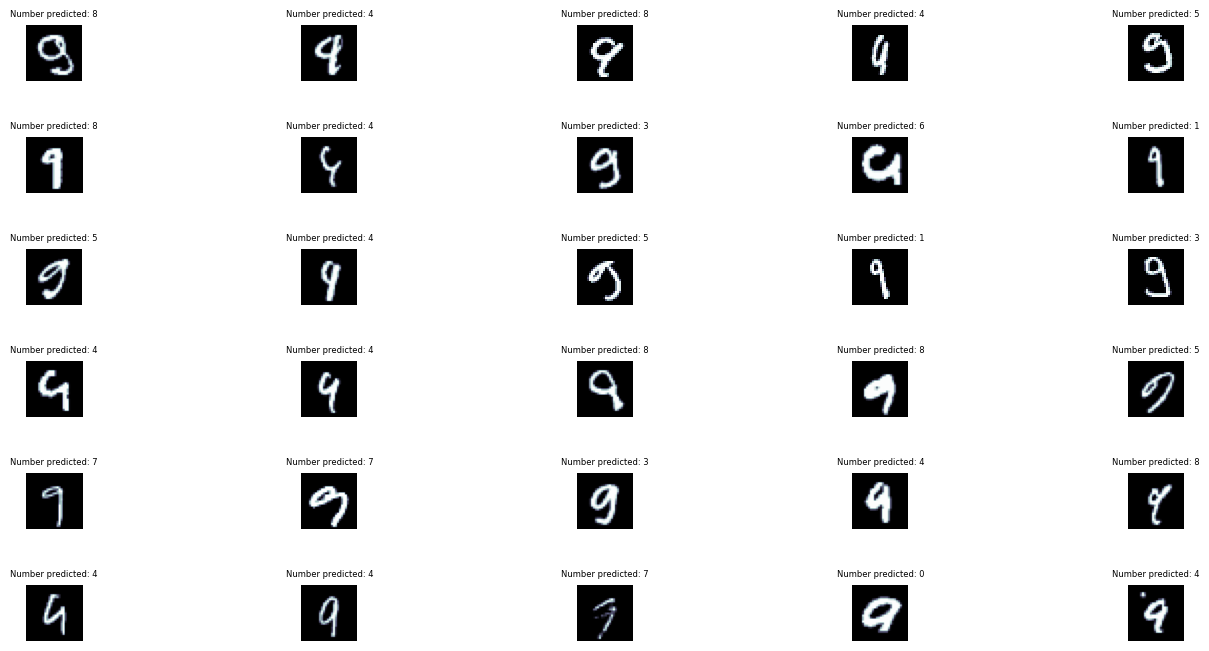

In [20]:
# see how were the classifications for number 2, the one with more wrong ones

wrong_nine = np.where(y_test[incorrect_class] == 9)
index_wrong_nine = incorrect_class[0][wrong_nine]

fig, ax = plt.subplots(6,5, figsize = (16,8))

axs = ax.flatten()

for i, x in zip(range(len(axs)), index_wrong_nine):
  axs[i].imshow(X = x_test[index_wrong_nine][i],
               cmap = "bone")
  axs[i].set_title(f"Number predicted: {number_predict[x]}", fontsize = 6)
  axs[i].axis("off")

plt.subplots_adjust(hspace=1, wspace=1)
plt.show()

In [19]:
print("The 9s were classified as: \n")

zeros = y_test[index_wrong_nine].size - np.count_nonzero(number_predict[index_wrong_nine])

print(f"0-> {zeros}")

unique = np.unique(number_predict[index_wrong_nine])
sum = 0

for i in unique[1:]:
  count = np.count_nonzero(number_predict[index_wrong_nine] == i)
  sum = sum + count
  print(f"{i}-> {count}")

sum = sum + zeros

print(f"\nThe total of wrong 9s classified were: {sum}.")

The 9s were classified as: 

0-> 1
1-> 2
3-> 3
4-> 10
5-> 4
6-> 1
7-> 3
8-> 6

The total of wrong 9s classified were: 30.


# Conclusions

Through our work, we were able to successfully build and train a neural network model that accurately classified digits in the MNIST dataset. We were able to preprocess the data, build a neural network architecture, configure the training process, and evaluate the model's performance.

Our analysis showed that the model was able to achieve a high level of accuracy and generalization performance, indicating that it is able to accurately classify new data. We were also able to gain insights into the model's performance through visualizations such as the confusion matrix and learning curve.

The successful development of our machine learning model has important implications for the field of computer vision and image classification. Accurate and reliable image classification models can be used in a variety of applications such as automated handwriting recognition, optical character recognition, and medical image analysis.

Furthermore, our work demonstrates the importance of careful data preprocessing, network architecture design, and hyperparameter tuning in the machine learning process. By carefully optimizing these factors, we were able to achieve a high level of accuracy and generalization performance.